In [1]:
from datetime import datetime
import re
from collections import Counter
from  itertools import chain

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as mtick


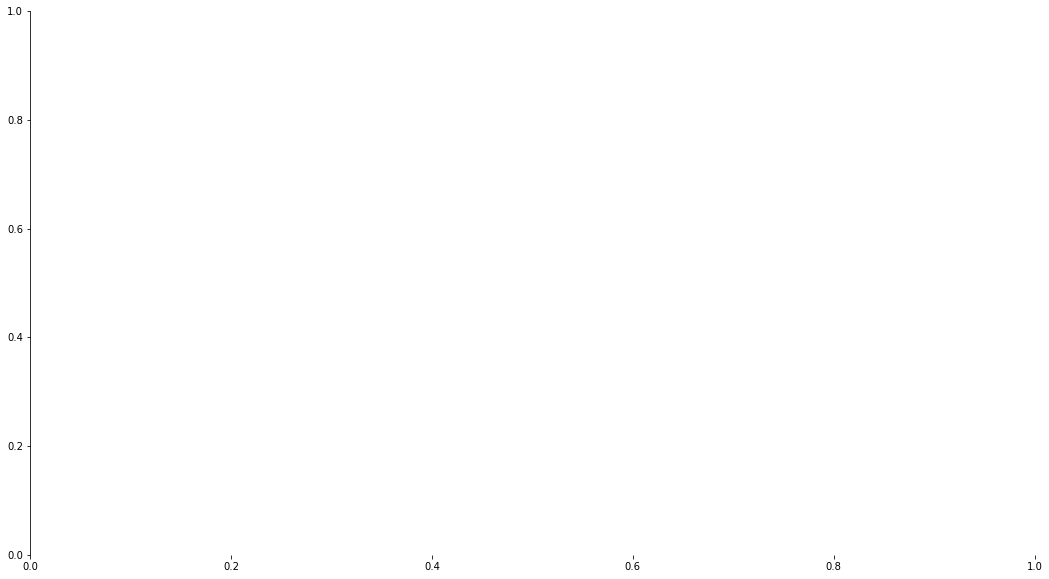

In [3]:
plt.rcParams["figure.figsize"] = (18,10)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)


# ITI Percentages Graph

In [4]:
#survey_df['Intertrial Interval (ITI) (time between trials)'].value_counts(dropna=False)

In [5]:
survey_df = pd.read_csv(r"./data/Lit Review - Copy of Form Responses.csv", keep_default_na=False)

In [6]:
survey_df["Rats used"] = survey_df["Species"].apply(lambda x: "1" if x == "Rats" or x == "Both" else "0")
survey_df["Mice used"] = survey_df["Species"].apply(lambda x: "1" if x == "Mice" or x == "Both" else "0")

In [7]:
comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')
#no_comma_df = survey_df['Intertrial Interval (ITI) (time between trials)'].str.contains(',')==False
rat_df = survey_df["Rats used"]
mice_df = survey_df["Mice used"]

In [8]:
#Finding number of mice trials
m_trials = 0
for i in range(len(mice_df)):
    if mice_df[i] =='1':
        m_trials = m_trials + 1
r_trials = 650-m_trials

In [9]:
#Finding percentage of trials that corresponded to each bin 
m_1 = 0
r_1 = 0
m_2 = 0  
r_2 = 0 
for i in range(len(comma_df)):
    if comma_df[i] == False and mice_df[i] == '1': #Mouse and no comma
        m_1 = m_1 +1
    elif comma_df[i] == False and mice_df[i] == '0': #Rat and no comma
        r_1 = r_1 +1
    elif comma_df[i] == True and mice_df[i] == '1': #Mouse comma
        m_2 = m_2 +1
    elif comma_df[i] == True and mice_df[i] == '0': #Rat comma
        r_2 = r_2 +1
        
#Getting percentage
mice_overall = []
mice_overall.append(m_1)
mice_overall.append(m_2)
mice_overall_P = [x / m_trials for x in mice_overall]

rats_overall = []
rats_overall.append(r_1)
rats_overall.append(r_2)
rats_overall_P = [x / r_trials for x in rats_overall]

Text(0, 0.5, 'Percentage')

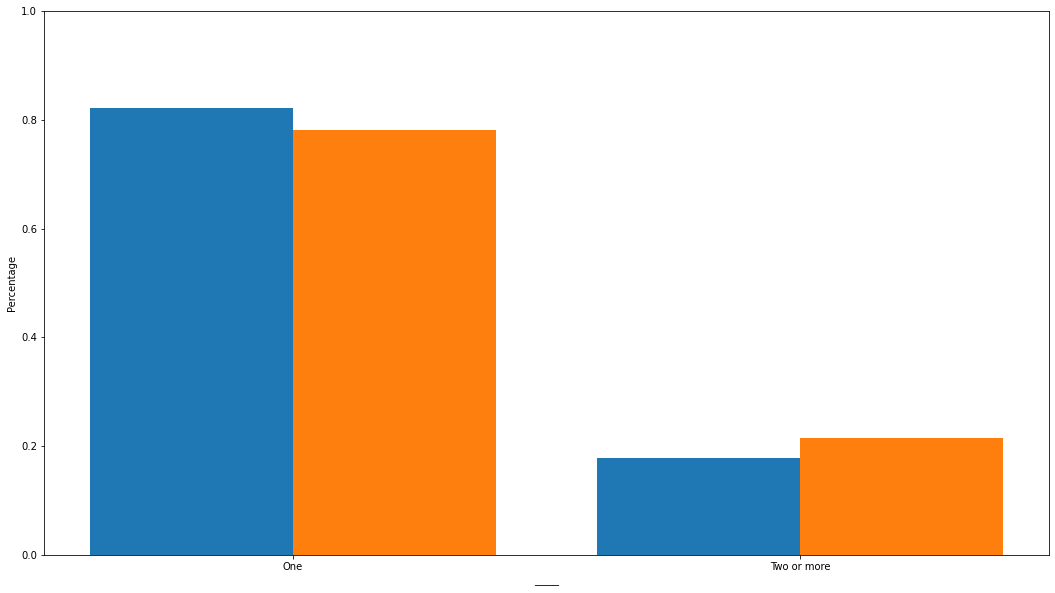

In [10]:
#Graphing percentages
x = ['One', 'Two or more']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, mice_overall_P, 0.4, label = 'mice')
plt.bar(x_axis + 0.2, rats_overall_P, 0.4, label = 'rats')
plt.xticks(x_axis, x)
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.xlabel("_____")
plt.ylabel('Percentage')


# Subject vs Social Agent Bar graph

Percent of papers the specify social agent vs subject

   Age

   Housing history

   Strain

   Social rank

   Sex

In [11]:
#Create two lists, one for subject one for social agent
#Within each column find number of nonspecifed and percentage them. Put them
# in correct list 
#Make bar graph 

In [12]:
subject_data = []
agent_data = []

In [13]:
#Subject Data
subject_age_P = sum(survey_df['Subject Age'].str.contains('Does not specify')) / len(survey_df['Subject Age'])
subject_data.append(subject_age_P)
subject_housing_P = sum(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'].str.contains('Does not specify')) / len(survey_df['Subject Strain  (i.e. C57BL6J or Sprague-Dawley) if multiple strains were used separate them by a semi colon and if mixed state mixed i.e. 129/SvJ mixed C57BL/6J; 129/SvJ mixed Swiss black'])
subject_data.append(subject_housing_P)

subject_sex_P = sum(survey_df['Subject Sex'].str.contains('Does not specify')) / len(survey_df['Subject Sex'])
subject_data.append(subject_sex_P)
subject_housing_P = sum(survey_df['Subject Housing'].str.contains('Does not specify')) / len(survey_df['Subject Housing'])
subject_data.append(subject_housing_P)

In [14]:
#Social Agent Data
agent_age_P = sum(survey_df['Social Agent Age (check all that apply)'].str.contains('Does not specify')) / len(survey_df['Social Agent Age (check all that apply)'])
agent_data.append(agent_age_P)
agent_housing_P = sum(survey_df['Social Agent Strain '].str.contains('pec' or 'n/a')) / len(survey_df['Social Agent Strain '])
agent_data.append(agent_housing_P)

agent_sex_P = sum(survey_df['Social Agent Sex'].str.contains('Does not specify')) / len(survey_df['Social Agent Sex'])
agent_data.append(agent_sex_P)
agent_housing_P = sum(survey_df['Social Agent Housing'].str.contains('Does not specify')) / len(survey_df['Social Agent Housing'])
agent_data.append(agent_housing_P)


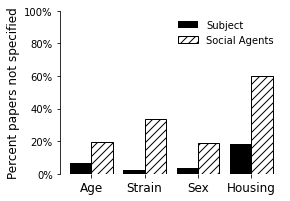

In [15]:
x = ['Age','Strain','Sex','Housing']
x_axis = np.arange(len(x))

plt.rcParams["figure.figsize"] = (4,3) # Size of the plotax.spines['top'].set_visible(False)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)

plt.bar(x_axis - 0.2, subject_data, 0.4, label = 'Subject', color = 'black')
plt.bar(x_axis + 0.2, agent_data, 0.4, label = 'Social Agents', fill=False, hatch='///')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) #Makes y percentages

plt.xticks(x_axis, x, fontsize = 12) # x tick spacing and size
plt.yticks(np.arange(0, 1.2, step=0.2))

#Visuals
#plt.xlabel("_____", fontsize = 15)
plt.ylabel('Percent papers not specified', fontsize = 12)
#plt.title("Title", fontsize = 30)
plt.legend(frameon = False) # legend, removes graph border
plt.savefig("./proc/L")
#plt.savefig(r'C:\Users\yongc\Documents\GitHub\literature_review_processing\results\2022_09_09_literature_review_processing\proc\PERCENT.svg')

## Box and Whisker Graph for Degree of Familiarity

In [16]:
#for i in dfam_lst:
#for i in range(1000):
#    dfam_lst.remove('Does not specify')
#dfam_lst = [x for x in dfam_lst if x != 'Does not specify']

dfam_lst = survey_df['Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '].tolist()
#[i if i!='5 min exposure or less' else '5' for i in dfam_lst]
#[x.replace('littermate', '') for x in dfam_lst
 
#for i in range(len(dfam_lst)): # Converts '5min..' to a the number 5
#    dfam_lst[i] = 5 if dfam_lst[i] == '5 min exposure or less' else dfam_lst[i]
#    if ', littermate' in dfam_lst[i]:
#        dfam_lst[i].replace(', littermate','')
        
list(filter(lambda a: a != 'Does not specify', dfam_lst)) #Removes all does not specify



['5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 '5 min exposure or less',
 

In [17]:
# turn column into series
column_name = 'Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '
dfam_df = pd.read_csv(r"./data/Lit Review - Copy of Form Responses.csv",usecols = [column_name])
dfam_df = dfam_df[dfam_df[column_name].str.contains('minutes')==True]

In [18]:
fixed_column_name = column_name + "_fixed"
copy_dfam_df = dfam_df.copy()
copy_dfam_df[fixed_column_name] = copy_dfam_df[column_name].apply(lambda x: x.split(","))
exploded_dfam_df = copy_dfam_df.explode(fixed_column_name).reset_index()

exploded_dfam_df = exploded_dfam_df[exploded_dfam_df[fixed_column_name].str.contains('minutes')==True]

In [19]:
exploded_dfam_df = exploded_dfam_df.drop(column_name,axis = 1)

In [20]:
exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)

C:\Users\yongc\AppData\Local\Temp/ipykernel_14080/3369587313.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)


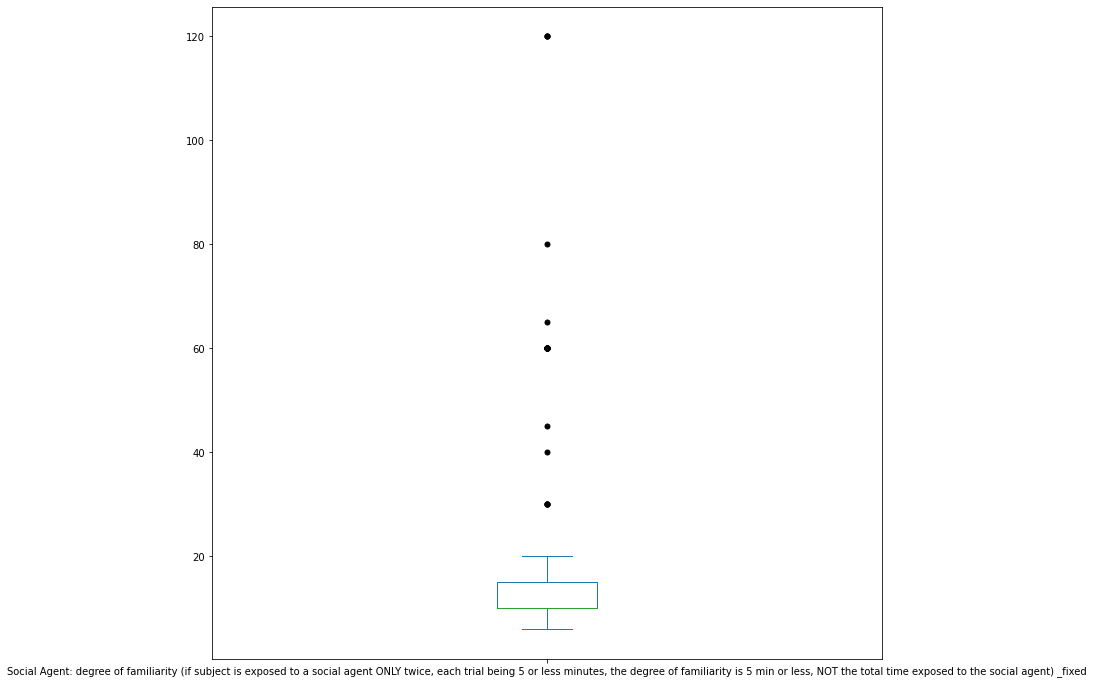

In [21]:
plt.rcParams["figure.figsize"] = (12,12)
ax = exploded_dfam_s.plot.box(flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'black'})

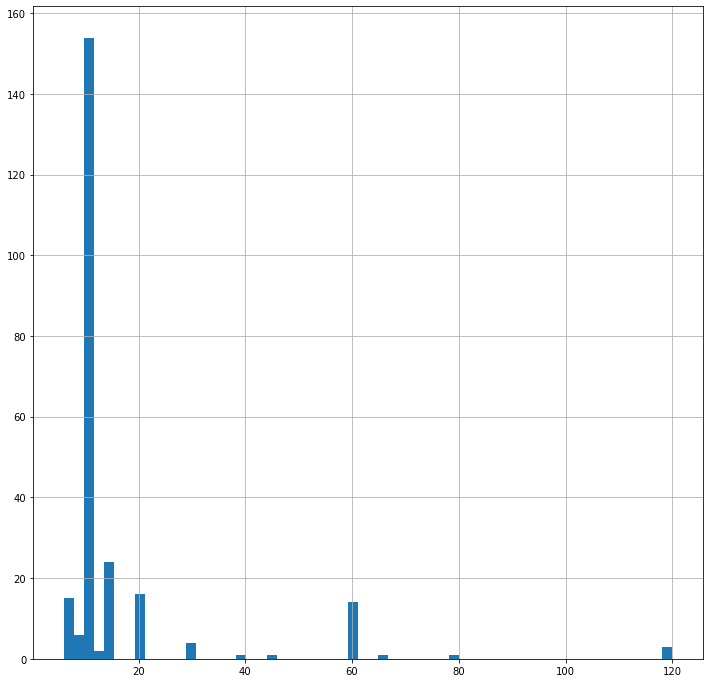

In [22]:
ax1 = exploded_dfam_s.hist(bins = 60)

In [23]:
#survey_df.keys()
dfam_df = pd.read_csv(r"./data/Lit Review - Copy of Form Responses.csv",usecols = ['Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '])
#print(dfam_df)
#boxplot = dfam_df.boxplot()



# Rank w/ only G-housed and Adult

SUBJECT: group-housed + adult( + old)

SOCIAL AGENT: group-housed + adult(+old)

calculate percent rank does not specify

In [24]:
rank_df = pd.read_csv(r"./data/Lit Review - Copy of Form Responses.csv")


In [25]:
#Filters for Subject (group-housed and adult/old only)
s_grank_df = rank_df.loc[rank_df['Subject Housing'].str.contains('group-housed')]
s_gArank_df = s_grank_df.loc[s_grank_df['Subject Age'].str.contains('adult' or 'old')]

#Filters for Social agent (group-housed and adult/old only)
sa_grank_df = rank_df.loc[rank_df['Social Agent Housing'].str.contains('group-housed')]
sa_gArank_df = sa_grank_df.loc[sa_grank_df['Social Agent Age (check all that apply)'].str.contains('adult' or 'old')]

In [26]:
#Shows all unique choices in a column 
sa_gArank_df['Social Agent Age (check all that apply)'].unique()

array(['adult (12-24 weeks)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks), adult (12-24 weeks), adult (24-40 weeks)',
       'young adult (8-12 weeks)', 'adult (week not specified)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks), adult (12-24 weeks)',
       'juvenile (3-7 weeks or week not specified), young adult (8-12 weeks)',
       'young adult (8-12 weeks), adult (12-24 weeks)',
       'adult (week not specified), young adult (8-12 weeks)',
       'juvenile (3-7 weeks or week not specified), adult (week not specified)',
       'juvenile (3-7 weeks or week not specified), adult (12-24 weeks)',
       'juvenile  (3-7 weeks or week not specified), young adult (8-12 weeks)',
       'adult (24-40 weeks)', 'adult (24-40 weeks), old (+40 weeks)',
       'adult (12-24 weeks), adult (24-40 weeks)'], dtype=object)

In [27]:
s_gArank_df['Subject Social Rank'].unique()

array(['Does not specify', 'Defeated, Does not specify', 'Ranked'],
      dtype=object)

In [28]:
subject_data = []
agent_data = []

#Percentage of Subject rank percentage that does not specify
subject_SR_P = sum(s_gArank_df['Subject Social Rank'].str.contains('Does not specify')) / len(s_gArank_df['Subject Social Rank'])
subject_data.append(subject_SR_P)

#Percentage of Social Agent rank percentage that does not specify
agent_SR_P = sum(sa_gArank_df['Social Agent Rank'].str.contains('Does not specify')) / len(sa_gArank_df['Social Agent Rank'])
agent_data.append(agent_SR_P)

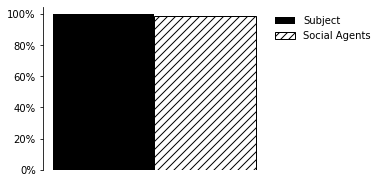

In [29]:
x = ['Rank']
x_axis = np.arange(len(x))

plt.rcParams["figure.figsize"] = (4,3) # Size of the plotax.spines['top'].set_visible(False)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
    
plt.xticks([]) # Removes x-ticks

plt.bar(x_axis - 0.2, subject_data, 0.4, label = 'Subject', color = 'black')
plt.bar(x_axis + 0.2, agent_data, 0.4, label = 'Social Agents', fill=False, hatch='///')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) #Makes y percentages

plt.legend(bbox_to_anchor=(1.0, 1.0),frameon = False) #Moves legend and takes frame off

# Pie Graph of familiarity

In [30]:
#Seperating by comma
column_name = 'Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) '
famtime_df = pd.read_csv(r"./data/Copy of Literature Review (Responses) - Copy of Form Responses 1.csv",usecols = [column_name])

fixed_column_name = column_name + "_fixed"
copy_famtime_df = famtime_df.copy()
copy_famtime_df[fixed_column_name] = copy_famtime_df[column_name].apply(lambda x: x.split(","))
exploded_famtime_df = copy_famtime_df.explode(fixed_column_name).reset_index()

#exploded_famtime_df = exploded_famtime_df[exploded_famtime_df[fixed_column_name].str.contains('minutes')==True]
#exploded_famtime_df = exploded_famtime_df.drop(column_name,axis = 1)

#exploded_dfam_s = exploded_dfam_df[fixed_column_name].str.replace(r'\D','').astype(int)

In [31]:
exploded_famtime_df

,index,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent)","Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed"
0,0,"10 min, 65 minutes",10 min
1,0,"10 min, 65 minutes",65 minutes
2,1,10 minutes,10 minutes
3,2,10 minutes,10 minutes
4,3,10 minutes,10 minutes
...,...,...,...
703,645,offspring,offspring
704,646,parent (mother),parent (mother)
705,647,parent (mother),parent (mother)
706,648,"parent (mother), 10 minutes",parent (mother)


In [32]:
sliced_column = "sliced column"
exploded_famtime_df[sliced_column] = 'ethnologically relevant relationships'

for i in range(len(exploded_famtime_df[sliced_column])):
    if '5 min exposure or less' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df[sliced_column][i] = '< 5 min'
    elif 'min' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df[sliced_column][i] = '5min - 2hrs'
    elif 'days' in exploded_famtime_df[fixed_column_name][i]:
        exploded_famtime_df[sliced_column][i] = '1 - 7 days'
    #If string contains minutes
    #IF string contains days

C:\Users\yongc\AppData\Local\Temp/ipykernel_14080/3522688294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_famtime_df[sliced_column][i] = '5min - 2hrs'
C:\Users\yongc\AppData\Local\Temp/ipykernel_14080/3522688294.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exploded_famtime_df[sliced_column][i] = '1 - 7 days'
C:\Users\yongc\AppData\Local\Temp/ipykernel_14080/3522688294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [33]:
exploded_famtime_df[sliced_column].unique()

array(['5min - 2hrs', 'ethnologically relevant relationships',
       '1 - 7 days', '< 5 min'], dtype=object)

In [34]:
exploded_famtime_df.head()

,index,"Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent)","Social Agent: degree of familiarity (if subject is exposed to a social agent ONLY twice, each trial being 5 or less minutes, the degree of familiarity is 5 min or less, NOT the total time exposed to the social agent) _fixed",sliced column
0,0,"10 min, 65 minutes",10 min,5min - 2hrs
1,0,"10 min, 65 minutes",65 minutes,5min - 2hrs
2,1,10 minutes,10 minutes,5min - 2hrs
3,2,10 minutes,10 minutes,5min - 2hrs
4,3,10 minutes,10 minutes,5min - 2hrs


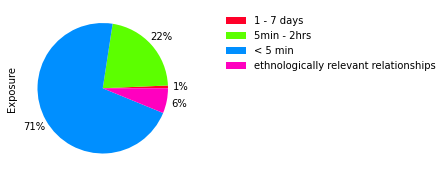

In [189]:
exploded_famtime_df.groupby([sliced_column]).sum().plot(kind='pie',subplots = True,autopct='%1.0f%%', pctdistance=1.2, labeldistance=None,cmap='gist_rainbow')
plt.legend(bbox_to_anchor=(1.2, 1.0),frameon = False) #Moves legend and takes frame off
plt.ylabel("Exposure")
plt.savefig("./proc/FAMTIME.svg")

# Social Memory/Recognition Papers of the Years

In [36]:
m_df = survey_df[['Title','Publication Date (YYYY-MM)']].copy()

In [37]:
# Filter for titles that have social memory
#n_df = m_df.loc[m_df['Title'].str.contains('social memory','Social memory')]
mne_df = m_df['Publication Date (YYYY-MM)'].str.extract(r'(\d+)')
mne_df = mne_df[0].astype(int)
mne_df = mne_df.value_counts()
mne_df = mne_df.drop(mne_df.index[-1])
#mne_df['Publication Date (YYYY-MM)'] = pd.to_numeric(mne_df['Publication Date (YYYY-MM)'], errors='coerce')

In [38]:
mne_df.iloc[::-1]

2000     5
2022     7
2002     9
2003     9
2004     9
2001     9
2006    12
2005    17
2007    23
2008    26
2012    26
2009    29
2011    31
2013    33
2017    36
2014    43
2016    43
2015    44
2018    47
2020    51
2019    54
2021    82
Name: 0, dtype: int64

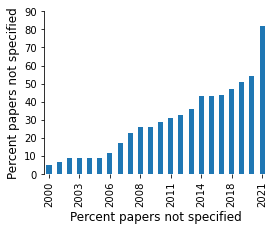

In [39]:
x=mne_df.iloc[::-1].plot.bar()
x.locator_params(axis='x', nbins=10)
plt.ylabel('Percent papers not specified', fontsize = 12)
plt.xlabel('Percent papers not specified', fontsize = 12)
plt.locator_params(axis='y', nbins=9)
for pos in ['right', 'top', 'bottom']: # Removes graph border
    plt.gca().spines[pos].set_visible(False)
plt.ylim([0, 90])
plt.savefig("./proc/SMPapers_YRS.svg")

# Pie Graph social agent idntities

insert graph showing percent of social agent identities: juvenile males, juvenile females, juveniles sex not specified, adult males, adult female OVX, intact adult females, adults sex not specified* 

juvenile male, juvenile female, juvenile unspecified, adult male, adult intact female, ovariectomized female, adult unspecified, unspecified female, unspecified male, does not specify

In [73]:
survey_df = pd.read_csv(r"C:\Users\yongc\Documents\GitHub\literature_review_processing\results\2022_09_09_literature_review_processing\data\Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)

In [74]:
survey_df = pd.read_csv(r"C:\Users\yongc\Documents\GitHub\literature_review_processing\results\2022_09_09_literature_review_processing\data\Copy of Literature Review (Responses) - Copy of Form Responses 1.csv", keep_default_na=False)
column_name = 'Social Agent Identity'
fixed_column_name = column_name + "_fixed"
copy_of_survey_df = survey_df.copy()

copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: x.split(","))
exploded_survey_df = copy_of_survey_df.explode(fixed_column_name).reset_index()


In [75]:
#column_name = 'Social Agent Identity'
#fixed_column_name = column_name + "_fixed"
#copy_of_survey_df = survey_df.copy()
#copy_of_survey_df[column_name]
#def debugfunc(x):
#    print(x)
#    return x.split(", ")
#copy_of_survey_df[fixed_column_name] = copy_of_survey_df[column_name].apply(lambda x: debugfunc(x))
#exploded_column_df = copy_of_survey_df.explode(fixed_column_name).reset_index()

In [76]:
exploded_survey_df[fixed_column_name] = exploded_survey_df[fixed_column_name].str.strip()

In [83]:
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['male juvenile'],'juvenile male')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['female juvenile'],'juvenile female')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['not specified'],'does not specify')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['infant male'],'juvenile male')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['juveniel not specified'],'juvenile not specified')
exploded_survey_df[fixed_column_name]=exploded_survey_df[fixed_column_name].replace(['infant not specified'],'juvenile not specified')


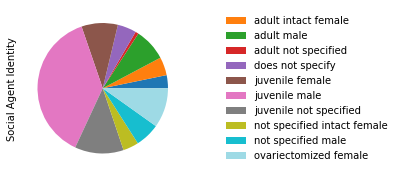

In [146]:
from matplotlib import cm
exploded_survey_df.groupby([fixed_column_name]).sum().plot(kind='pie',subplots = True, pctdistance=1.4, labeldistance=None,cmap='tab20')
plt.legend(bbox_to_anchor=(1.2, 1.0),frameon = False) #Moves legend and takes frame off
plt.ylabel("Social Agent Identity")
plt.savefig("./proc/SAIdentity.svg")

In [ ]:
import random
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
n = 20
slices = np.arange(n)
activities = np.arange(n)
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
for i in range(n)]

patches, texts = plt.pie(slices,
   colors=colors,
   startangle=90,
   labels=slices)

labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(activities,
100.*slices/slices.sum())]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=8)
plt.show()